In [20]:
import csv
from torch.utils.data import Dataset


class GoDataset(Dataset):
    def __init__(self, path, transform=None):
        super().__init__()
        self.path = path
        # convert from abc to 123
        self.transform = transform

        # Load data from CSV file
        with open(self.path, newline='') as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            self.data = list(reader)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Get data at the given index
        row = self.data[idx]

        return row


goDataset = GoDataset('data/train/dan_train.csv')


In [21]:
print(goDataset.__len__())

100160


In [22]:
for i in range(5):
    print(goDataset[i])

['DL0000000001', 'B', 'B[pq]', 'W[qd]', 'B[cp]', 'W[dd]', 'B[qo]', 'W[eq]', 'B[iq]', 'W[cq]', 'B[bq]', 'W[br]', 'B[dq]', 'W[cr]', 'B[dp]', 'W[dr]', 'B[bp]', 'W[gq]', 'B[cf]', 'W[ce]', 'B[df]', 'W[ck]', 'B[cm]', 'W[ch]', 'B[di]', 'W[dh]', 'B[ci]', 'W[bi]', 'B[bj]', 'W[bg]', 'B[ai]', 'W[bh]', 'B[cj]', 'W[bf]', 'B[dk]', 'W[kc]', 'B[ff]', 'W[fd]', 'B[oc]', 'W[pc]', 'B[od]', 'W[qg]', 'B[ic]', 'W[ke]', 'B[he]', 'W[og]', 'B[ld]', 'W[kd]', 'B[mf]', 'W[kg]', 'B[mh]', 'W[ki]', 'B[jf]', 'W[kf]', 'B[qe]', 'W[re]', 'B[pe]', 'W[rc]', 'B[mj]', 'W[qj]', 'B[pi]', 'W[qi]', 'B[ql]', 'W[pk]', 'B[lh]', 'W[kh]', 'B[fb]', 'W[gc]', 'B[gb]', 'W[hc]', 'B[hb]', 'W[id]', 'B[ed]', 'W[ec]', 'B[fc]', 'W[ee]', 'B[hd]', 'W[gd]', 'B[jd]', 'W[ib]', 'B[jc]', 'W[jb]', 'B[je]', 'W[ef]', 'B[lb]', 'W[kb]', 'B[ig]', 'W[kq]', 'B[mq]', 'W[lq]', 'B[mp]', 'W[ko]', 'B[io]', 'W[km]', 'B[ln]', 'W[kn]', 'B[ml]', 'W[fn]', 'B[im]', 'W[kk]', 'B[jl]', 'W[kl]', 'B[ii]', 'W[lo]', 'B[mo]', 'W[lm]', 'B[nm]', 'W[mn]', 'B[nn]', 'W[ij]', 'B[hj]

# 印棋盤

In [39]:
import matplotlib.pyplot as plt
import numpy as np


def draw_board(board):
    # Draw the board
    board = np.array(board)
    subplot = plt.subplot()
    # -1 is black, 1 is white, 0 is yellow
    black = (board == -1)
    white = (board == 1)
    yellow = (board == 0)
    # Draw colored squares
    subplot.scatter(np.where(black)[1], np.where(black)[0], marker='s', s=250, c='black')
    subplot.scatter(np.where(white)[1], np.where(white)[0], marker='s', s=250, c='white')
    subplot.scatter(np.where(yellow)[1], np.where(yellow)[0], marker='s', s=250, c='yellow')
    # Draw lines
    for i in range(19):
        subplot.plot([i, i], [0, 18], 'k')
        subplot.plot([0, 18], [i, i], 'k')
    
    # make length of x and y axis equal
    subplot.set_aspect(1)

    plt.show()


# implement game logic

In [44]:
def check_neighbors(board, player, x, y):
    pass


def update_board(board, player, x, y):
    if x > 0:
        if board[x - 1][y] == -player:
            check_neighbors(board, player, x - 1, y)


update_board(_, _, 18, 0)


Invalid move


# transform

B[pq]


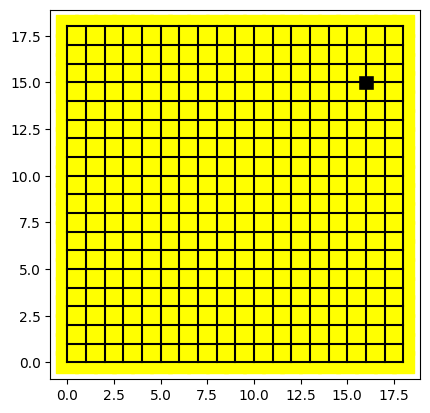

In [40]:
char = 'abcdefghijklmnopqrs'
char2idx = {c: i for i, c in enumerate(char)}

def transform(row):
    # Transform data from CSV file into a board
    board = np.zeros((19, 19))
    current_player = -1 if row[1] == 'B' else 1
    # for i in range(2, len(row)):
    print(row[2])
    x = char2idx[row[2][2]]
    y = char2idx[row[2][3]]
    board[x][y] = current_player
    current_player = -current_player        
    return board

board = transform(goDataset[0])
draw_board(board)